In [1]:
import subprocess
import os

import netCDF4
import numpy as np
import glob
import time
import matplotlib.pyplot as plt
import copy
import xarray as xr
from datetime import datetime, timedelta 
from ocean_c_lab_tools import *
from celluloid import Camera 
import PyCO2SYS as csys
import seawater as sw
import xesmf as xe

In [2]:
x=xr.open_dataset('/expanse/lustre/projects/cos100/uheede/Arctic_datasets/Carra/r2_202002.nc',decode_times=False)
r2=xr.open_dataset('/expanse/lustre/projects/cos100/uheede/Arctic_datasets/Carra/r2_202002.nc',decode_times=False)
sh2=xr.open_dataset('/expanse/lustre/projects/cos100/uheede/Arctic_datasets/Carra/sh2_202002.nc',decode_times=False)
skt=xr.open_dataset('/expanse/lustre/projects/cos100/uheede/Arctic_datasets/Carra/skt_202002.nc',decode_times=False)
ssr=xr.open_dataset('/expanse/lustre/projects/cos100/uheede/Arctic_datasets/Carra/ssr_202002.nc',decode_times=False)
str=xr.open_dataset('/expanse/lustre/projects/cos100/uheede/Arctic_datasets/Carra/str_202002.nc',decode_times=False)
t2m=xr.open_dataset('/expanse/lustre/projects/cos100/uheede/Arctic_datasets/Carra/t2m_202002.nc',decode_times=False)
tp=xr.open_dataset('/expanse/lustre/projects/cos100/uheede/Arctic_datasets/Carra/tp_202002.nc',decode_times=False)
u10=xr.open_dataset('/expanse/lustre/projects/cos100/uheede/Arctic_datasets/Carra/u10_202002.nc',decode_times=False)
v10=xr.open_dataset('/expanse/lustre/projects/cos100/uheede/Arctic_datasets/Carra/v10_202002.nc',decode_times=False)
strd=xr.open_dataset('/expanse/lustre/projects/cos100/uheede/Arctic_datasets/Carra/strd_202002.nc',decode_times=False)
tp=xr.open_dataset('/expanse/lustre/projects/cos100/uheede/Arctic_datasets/Carra/tp_202002.nc',decode_times=False)




/home/uheede/.conda/envs/xarray_new/lib/python3.10/site-packages/xarray/backends/plugins.py:80: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


In [3]:
lon_min=(310)
#lon_max=(x.longitude.max().values)
lon_max=(359.99)
lon_step=((lon_max-lon_min)/len(x.x))

lat_min=(x.latitude.min().values)
lat_max=(x.latitude.max().values)
lat_step=((lat_max-lat_min)/len(x.y))

In [4]:
ds_out = xr.Dataset(
    {
        "lon": (["lon"], np.arange(lon_min, lon_max, lon_step), {"units": "degrees_north"}),
        "lat": (["lat"], np.arange(lat_min, lat_max, lat_step), {"units": "degrees_east"}),
    }
)

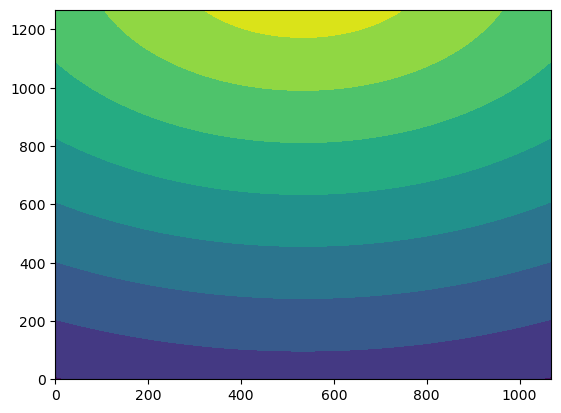

In [10]:
plt.contourf(t2m['latitude'])

In [5]:
regridder = xe.Regridder(x, ds_out, "bilinear")
r2_regrid=regridder(r2['r2'])
sh2_regrid=regridder(sh2['sh2'])
skt_regrid=regridder(skt['skt'])

ssr_regrid=regridder(ssr['ssr'])
str_regrid=regridder(str['str'])
t2m_regrid=regridder(t2m['t2m'])
tp_regrid=regridder(tp['tp'])
u10_regrid=regridder(u10['u10'])
v10_regrid=regridder(v10['v10'])

In [6]:
strd_regrid=regridder(strd['strd'])

In [7]:
strd_regrid.attrs['long name'] = 'Surface long-wave (thermal) radiation downwards'
#str_regrid=str_regrid.reset_coords(names="heightAboveGround",drop=True)


In [10]:
r2_regrid.attrs['long name'] = '2 metre relative humidity'
#r2_regrid=r2_regrid.reset_coords(names="heightAboveGround",drop=True)

sh2_regrid.attrs['long name'] = '2 metre specific humidity'
#sh2_regrid=sh2_regrid.reset_coords(names="heightAboveGround",drop=True)

skt_regrid.attrs['long name'] = 'Skin temperature'
#skt_regrid=skt_regrid.reset_coords(names="heightAboveGround",drop=True)

ssr_regrid.attrs['long name'] = 'Surface net short-wave (solar) radiation'
#ssr_regrid=ssr_regrid.reset_coords(names="heightAboveGround",drop=True)

str_regrid.attrs['long name'] = 'Surface long-wave (thermal) radiation downwards'
#str_regrid=str_regrid.reset_coords(names="heightAboveGround",drop=True)

u10_regrid.attrs['long name'] = '10 metre U wind component'
#u10_regrid=u10_regrid.reset_coords(names="heightAboveGround",drop=True)

v10_regrid.attrs['long name'] = '10 metre V wind component'
#v10_regrid=v10_regrid.reset_coords(names="heightAboveGround",drop=True)

t2m_regrid.attrs['long name'] = '2 metre temperature'
#t2m_regrid=t2m_regrid.reset_coords(names="heightAboveGround",drop=True)

tp_regrid.attrs['long name'] = 'total precipitation'
#tp_regrid=tp_regrid.reset_coords(names="heightAboveGround",drop=True)


In [15]:
carra_2020 = xr.Dataset({
    'u10': u10_regrid.squeeze(),
    'v10': v10_regrid.squeeze(),
    't2m': t2m_regrid.squeeze(),
    'sst': skt_regrid.squeeze(),
    'ssr': ssr_regrid.squeeze(),
   # 'ssr': ssr_regrid.squeeze(),
    'sh2': sh2_regrid.squeeze(),
  #  'strd': strd_regrid.squeeze(),
    'strd': strd_regrid.squeeze(),
    'tp': tp_regrid.squeeze(),
    'time': x['time'],
    'longitude': u10_regrid.lon,
    'latitude': u10_regrid.lat,
    
})

In [16]:
carra_2020.to_netcdf('/expanse/lustre/projects/cos100/uheede/Arctic_datasets/Carra/carra_022021.nc')

In [12]:
carra_2020.u10

<xarray.DataArray 'u10' (time: 448, lat: 1269, lon: 1069)>
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
...
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]], dtype=float32)
Coordinates:
  * time               (time) int64 1612137600 1612148400 ... 1677618000
    step               float64 1.0
    valid_time         (time) float64 1.612e+09 1.612e+09 ... 1.678e+09
  * lon                (lon) float64 310.0 310.0 310.1 ... 359.8 359.9 359.9
  * lat                (lat) float64 55.81 55.83 55.86 ... 85.98 86.01 86.03
    surface            float64 0.0
    heightAboveGround  float64 2.0
Attributes:
    regrid_method:  bilinear
    long name:      10 metre U wind component

In [13]:
ssr_corr=xr.open_dataset('/expanse/lustre/projects/cos100/uheede/C-Star/ERA5/SSR_correction.nc')

In [ ]:
lon_min=(x.longitude.min().values)
lon_max=(x.longitude.max().values)

lat_min=(x.latitude.min().values)
lat_max=(x.latitude.max().values)

ds_out = xr.Dataset(
    {
        "lon": (["lon"], np.arange(lon_min, lon_max, lon_step), {"units": "degrees_north"}),
        "lat": (["lat"], np.arange(lat_min, lat_max, lat_step), {"units": "degrees_east"}),
    }
)

regridder = xe.Regridder(ssr_corr, ds_out, "bilinear")

In [ ]:
ssr_corr_regrid=regridder(ssr_corr)

In [ ]:
ssr_corr_regrid.to_netcdf('/expanse/lustre/projects/cos100/uheede/Arctic_datasets/Carra/SSR_correction.nc')

In [ ]:
ssr_corr